In [1]:
from math import log, sqrt
import matplotlib.pyplot as plt
import PyPDF2
from random import randrange

Para a parte I: cifrador / decifrador de Vigenere

cifrador: recebe mensagem e chave e cifra a mensagem segundo a cifra de vigenere
decifrador: recebe uma cifra e uma chave e retorna a mensagem cifrada

letras sao sempre minusculas e letras acentuadas/pontuação não sofrem alterações

In [2]:
alfabeto = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

def encrypt(plaintext: str, key):
    plaintext = plaintext.lower()
    ciphertext = ''
    for i in range(len(plaintext)):
        if plaintext[i] in alfabeto:
            p = alfabeto.index(plaintext[i])
            k = alfabeto.index(key[i % len(key)])
            c = (p + k) % 26
            ciphertext += alfabeto[c]
        else:
            ciphertext += plaintext[i]

    return ciphertext

def decrypt(ciphertext, key):
    plaintext = ''

    for i in range(len(ciphertext)):
        if ciphertext[i] in alfabeto:
            p = alfabeto.index(ciphertext[i])
            k = alfabeto.index(key[i % len(key)])
            c = (p - k) % 26
            plaintext += alfabeto[c]
        else:
            plaintext += ciphertext[i]
    return plaintext


Para testar:

In [10]:
plaintext_pt = 'a língua portuguesa é uma das línguas mais faladas no mundo, com milhões de falantes nativos e não nativos em todo o mundo. ela é a língua oficial de países como portugal, brasil, moçambique, angola, cabo verde e muitos outros.a história da língua portuguesa remonta aos tempos antigos, quando os romanos ocuparam a península ibérica e deixaram sua influência linguística. ao longo dos séculos, o português evoluiu e absorveu influências de várias culturas, incluindo árabe, africana e indígena.hoje, o português é uma língua rica e diversificada, com uma vasta literatura que abrange desde os escritos dos grandes poetas portugueses, como luís de camões, até a moderna literatura brasileira de autores como machado de assis e clarice lispector.além disso, o português é uma língua vibrante e dinâmica, usada em diversas formas de mídia, incluindo música, cinema e televisão. o samba, o fado e o bossa nova são apenas alguns exemplos dos estilos musicais que têm suas raízes na língua portuguesa.em resumo, o português é uma língua fascinante, cheia de história e cultura, que desempenha um papel importante no mundo contemporâneo e continua a evoluir com o passar do tempo.'

key = 'abacate'

ciphertext_pt = encrypt(plaintext_pt, key)
print(ciphertext_pt)

a línzya pqrmygveua é vmc wes línzyat oabw ganawes nq fyneo, vsm mklaõet fe jamaptxw oavioss e nãs oavioss eo msdp q fyneo. xpa é a píogwa sfjckae df raíwet eofs qottnkam, bkesjl, fsçbmdijye, cnzslb, ctfo vgrwi f oubxot qumvot.c amsuótit db nígkub rokxuhugst rfmqnme bou mimqou trtjgqs, qvapdh ot tofenps ovypbrcm e qepígwuma iuérjcc x dfizakem swa mnglwêggib nigkuísvive. aq esnho dhw téeuess, q isruuiuêw fvqlnmu e auwosvgu mnglwêggibs dx várkal cvlvukes, knvpujnfo árbbg, efsieage f knwígfnc.asjf, o tostwgnês é ufe mípgne siea i eixekwigieawe, cqm ymb xalxa lktxvauuta uuf cbkenhe dxwdf qs isdrkthw eou zvaodgs toftcs tostwgnisfs, vsmp nuíw ee ctqõfs, txé a mhhesnc emtfrctnva btalmlfita he awthvet eofs naehtho dg twsjs e glbrkcx ljsrevxos.cléq eiush, p rokxuhuês é vmc eínhuc ombsaptx e dknâqida, nwaea ef djvgrles fqrfes dg fídja, brcmuknws núuive, cknxqa e txpewiuãh. p uaffa, q yedp g h bpsua rowa sãs bpgntw bliugw fxgmipot fol ettklhw nuuiveit sux têm snes rcísis nc eínhuc isruuiuxwa.eo k

In [11]:
plaintext = decrypt(ciphertext_pt, key)
print(plaintext_pt)

a língua portuguesa é uma das línguas mais faladas no mundo, com milhões de falantes nativos e não nativos em todo o mundo. ela é a língua oficial de países como portugal, brasil, moçambique, angola, cabo verde e muitos outros.a história da língua portuguesa remonta aos tempos antigos, quando os romanos ocuparam a península ibérica e deixaram sua influência linguística. ao longo dos séculos, o português evoluiu e absorveu influências de várias culturas, incluindo árabe, africana e indígena.hoje, o português é uma língua rica e diversificada, com uma vasta literatura que abrange desde os escritos dos grandes poetas portugueses, como luís de camões, até a moderna literatura brasileira de autores como machado de assis e clarice lispector.além disso, o português é uma língua vibrante e dinâmica, usada em diversas formas de mídia, incluindo música, cinema e televisão. o samba, o fado e o bossa nova são apenas alguns exemplos dos estilos musicais que têm suas raízes na língua portuguesa.em r

Parte II: ataque de recuperacao por analise de frequencia:

primeiro, precisamos da frequencia de cada letra tanto em portugues como em ingles

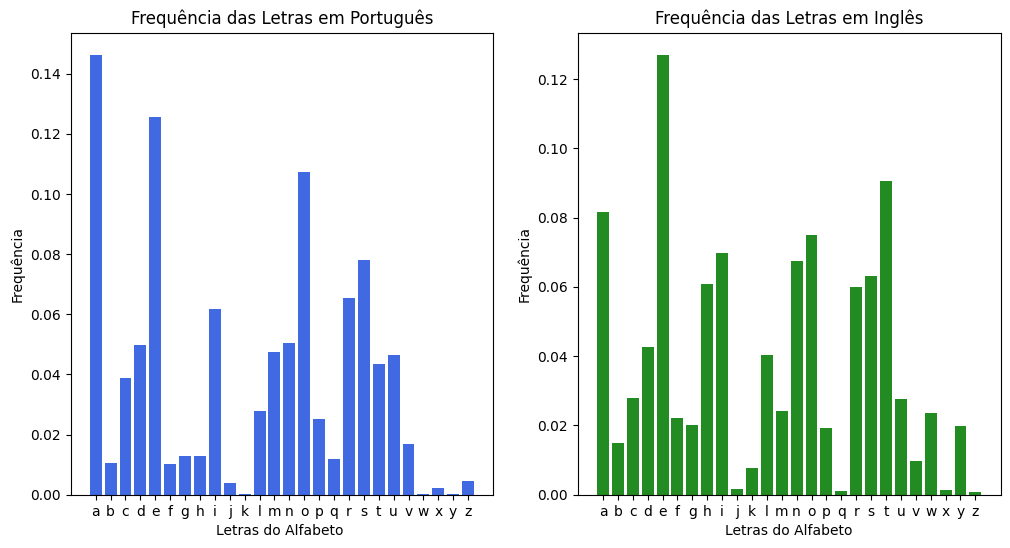

In [12]:
freq_pt = [
    0.1463,
    0.0104,
    0.0388,
    0.0499,
    0.1257,
    0.0102,
    0.0130,
    0.0128,
    0.0618,
    0.0040,
    0.0002,
    0.0278,
    0.0474,
    0.0505,
    0.1073,
    0.0252,
    0.0120,
    0.0653,
    0.0781,
    0.0434,
    0.0463,
    0.0167,
    0.0001,
    0.0021,
    0.0001,
    0.0047]

freq_en = [
    0.08167,
    0.01492,
    0.02782,
    0.04253,
    0.12702,
    0.02228,
    0.02015,
    0.06094,
    0.06966,
    0.00153,
    0.00772,
    0.04025,
    0.02406,
    0.06749,
    0.07507,
    0.01929,
    0.00095,
    0.05987,
    0.06327,
    0.09056,
    0.02758,
    0.00978,
    0.02360,
    0.00150,
    0.01974,
    0.00074]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].bar(alfabeto, freq_pt, color='royalblue')
axs[0].set_xlabel('Letras do Alfabeto ')
axs[0].set_ylabel('Frequência')
axs[0].set_title('Frequência das Letras em Português')

axs[1].bar(alfabeto, freq_en, color='forestgreen')
axs[1].set_xlabel('Letras do Alfabeto')
axs[1].set_ylabel('Frequência')
axs[1].set_title('Frequência das Letras em Inglês')

# Mostrar o gráfico
plt.show()

antes de tentar descobrir a chave, precisamos de um metodo para definir seu tamanho, para isso usaremos o metodo "index of coincidence"(IoC), que indica a probabilidade de duas letras aleatoria de um texto serem iguais, assim, tendo como base o IoC esperado de um texto, podemos testar diferentes tamanhos de chave, em busca do tamanho que fornece o maior IoC, o IoC medio da lingua portuguesa e proximo da lingua inglesa, assim, podemos usar a mesma fomrula para os dois textos

In [13]:
def index_of_coincidence(text):
    # conta qantas vezes cada letra aparece
    counts = [0] * 26
    for char in text:
        if char not in alfabeto:
            continue
        counts[alfabeto.index(char)] += 1
    num = 0
    total = 0
    for i in range(26):
        num += counts[i] * (counts[i] - 1)
        total += counts[i]
    # multiplicanod por 26 (tamanho do alfabeto) para normalizar a formula, resultado esperado de um texto seria > 1.6
    return 26 * num / (total * (total - 1))

agora para testar o IoC com diferentes tamanhos de chave

In [14]:
def find_key_length(ciphertext):
    found = False
    period = 0

    while not found:
        period += 1
        slices = [''] * period
        for i in range(len(ciphertext)):
            slices[i % period] += ciphertext[i]
        sum = 0
        for i in range(period):
            sum += index_of_coincidence(slices[i])
        ioc = sum / period
        if ioc > 1.6:
            found = True
    return period

podemos visualizar usando o mesmo texto cripografado no exemplo I

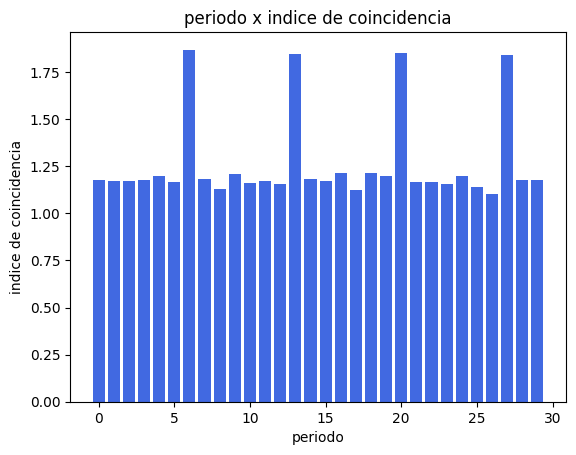

In [15]:
period = 0
iocs = []
for i in range(30):
    period+=1
    slices = ['']*period
    for i in range(len(ciphertext)):
        slices[i%period] += ciphertext[i]
    sum = 0
    for i in range(period):
        sum += index_of_coincidence(slices[i])
    ioc = sum / period
    iocs.append(ioc)

plt.xlabel("periodo")
plt.ylabel("indice de coincidencia")
plt.title("periodo x indice de coincidencia")
plt.bar(list(range(len(iocs))), iocs, color = 'royalblue')

plt.show()

podemos notar que o pico ocorre em um periodo de 7, assim, pegamos o primeiro valor (7) como o tamanho da chave

Agora para descobrir a chave, um metodo e separar a cifra em n grupos, sendo n o tamanho da chave, sendo cada grupo formado por letras que foram alteradas pela emsma letra da chave, e comparar a frequencia dessas letras com a frequencia do alfabeto, procurando o shift que quega mais proximo, para isso usaremos a funcao cosseno para normalizar esses vetores de frequencia, da forma abaixo

In [19]:
def cosange(x, y):
    numerator = 0
    lengthx2 = 0
    lengthy2 = 0
    for i in range(len(x)):
        numerator += x[i] * y[i]
        lengthx2 += x[i] * x[i]
        lengthy2 += y[i] * y[i]
    return numerator / sqrt(lengthx2 * lengthy2)

def single_letter_rotation(ciphertext, key_length, freq_lang):
    freq = []
    slices = [''] * key_length
    for i in range(len(ciphertext)):
        slices[i % key_length] += ciphertext[i]

    for i in range(key_length):
        freq.append([0] * 26)
        for j in range(len(slices[i])):
            if slices[i][j] not in alfabeto:
                continue
            freq[i][alfabeto.index(slices[i][j])] += 1
        for j in range(26):
            freq[i][j] = freq[i][j] / len(slices[i])

    key = ['a'] * key_length
    for i in range(key_length):
        maior = 0
        for j in range(26):
            test_table = freq[i][j:] + freq[i][:j]
            if cosange(freq_lang, test_table) > maior:
                key[i] = alfabeto[j]
                maior = cosange(freq_lang, test_table)
    return ''.join(key)

podemos testar com uma cifra em ingles que foi usado a chave "smallest"

In [20]:
ciphertext_en = 'udelemfz fhp agkce qcse hdiye wwafizyw ggf acslxufeo fq m.s. ggiqdirsx esi xpefl fhle fh anp sogk a framwp deelxk czacjbytt tr mzqsp agkce, ds mzq qzyfwsfizy (tfp jzy!) oay ggiq ayo vbkfrtmylx ut tr mzq fymlxv selxwl iiessmm becxmklaan lrv outszyl hmytyk vgbyctkzm dojlplbwe. dtwvaml cydxk, dpx ygdts mf lte rifxjml eijfk oq ykx bace gy fhtd dbuqndp, thblj xg uapjtry szd omkmjubfemfz brzuium sueprtxjs™ ppwvldoytg pgdkd xg hdoepgl lte avgcwot rylxfnecr™ vgzcpax tfp ecevxemrv. hkgvene ynlqnmpvy ae l vwzaetpciv ldaopqskc, lyh fsk yzx uw udph bx yzf uasdgp jgk mn pfghc, pigwil bj jgedawtyk mzq epvel af elw ldaopqskc ltniflw, tygdnvunr tsrazg csqtdfipd xhj udp gy fhp tjhbqce kmmwzbpck mjmdpxejd. iq cgn po ysl utacri tfktstry xar nshbwe zq laae pmsgd, czxtdrazg hmla fhp xjtvqmlco eaoeydi bk vpcc xsey. cgn yaj ykx fhtd wugak qsj fqacwc tfk afvhhkq dfgz se ncismaan zj wwdiglxaow wzcok, deazvll, ppcjgkemnnpw tfp cpwwtjoh. tjhbqce kmmwzbpck xtaovd etq bp qgwaripo sgv pctrlxv ayo ybnqn lasr—kof qsr po avsvluclwpq szyesmfz un elw mzieph llmtpd oblt pmsgdk nze hkgfeneiv tk f.w. uapjcmyal llh. kwpidevaumfizy al eumuium fo elw ldaopqskc ltniflw, pdtwvamlwj uheyecnmse deotwlkanuetsf.'
print(single_letter_rotation(ciphertext_en, 8, freq_en))

smallest


tambem podemos testar com o mesmo texto usado na questao I

In [21]:
print(single_letter_rotation(ciphertext_pt, 7, freq_pt))

abacate


Agora podemos criar uma funçao que une os dois metodos, e da mensagem e sua lingua consegue achar a chave

In [22]:
def vigenere_cracker(ciphertext, lang):
    if ciphertext == '':
        return
    key_length = find_key_length(ciphertext)

    if lang == 'pt':
        key = single_letter_rotation(ciphertext, key_length, freq_pt)
    elif lang == 'en':
        key = single_letter_rotation(ciphertext, key_length, freq_en)

    print(f'chave encontrada:{key}\nmensagem gerada pela chave:\n{decrypt(ciphertext, key)}')


agora para usar as funcoes:

In [29]:
print("1: encrypt   2: decrypt   3: crack")
opcao = int(input())
if opcao == 1:
    print('mensagem dps chave meu querido\n')
    plaintext = input().lower()
    key = input().lower()
    if any(char not in alfabeto for char in key):
        print('colabora na chave patrao')
    print(encrypt(plaintext, key))
elif opcao == 2:
    print('mensagem dps chave meu querido\n')
    ciphertext = input().lower()
    key = input().lower()
    if any(char not in alfabeto for char in key):
        print('colabora na chave patrao')
    print(decrypt(ciphertext, key))

elif opcao == 3:
    ciphertext = input().lower()
    lang = input().lower()
    vigenere_cracker(ciphertext,lang)


1: encrypt   2: decrypt   3: crack
chave encontrada:smallest
mensagem gerada pela chave:
creating the works from print editions not protected by u.s. copyright law means that no one owns a united states copyright in these works, so the foundation (and you!) can copy and distribute it in the united states without permission and without paying copyright royalties. special rules, set forth in the general terms of use part of this license, apply to copying and distributing project gutenberg™ electronic works to protect the project gutenberg™ concept and trademark. project gutenberg is a registered trademark, and may not be used if you charge for an ebook, except by following the terms of the trademark license, including paying royalties for use of the project gutenberg trademark. if you do not charge anything for copies of this ebook, complying with the trademark license is very easy. you may use this ebook for nearly any purpose such as creation of derivative works, reports, performances 